<a href="https://colab.research.google.com/github/JoseLuisMontemayor/Pricing-Stock-Prediction/blob/main/Pricing_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: The program uses an artificial recurrent neural network called Long Short Term Memory (LSTM) to predict the closing stock of a corporation (Apple) using the past 60 day stock price

In [ ]:
# Import libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas_datareader as pdr
from pandas_datareader import data as pdr
!pip install yfinance
import yfinance as yfin
yfin.pdr_override()



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL',data_source="yahoo", start='2012-01-01', end='2019-12-17')

#Show the data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.540044,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.607436,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.747409,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.880666,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.860235,394024400
...,...,...,...,...,...,...
2019-12-10,67.150002,67.517502,66.464996,67.120003,65.865036,90420400
2019-12-11,67.202499,67.775002,67.125000,67.692497,66.426834,78756800
2019-12-12,66.945000,68.139999,66.830002,67.864998,66.596107,137310400


In [ ]:
# Get the number of rows and columns in the data set
df.shape

(2002, 6)

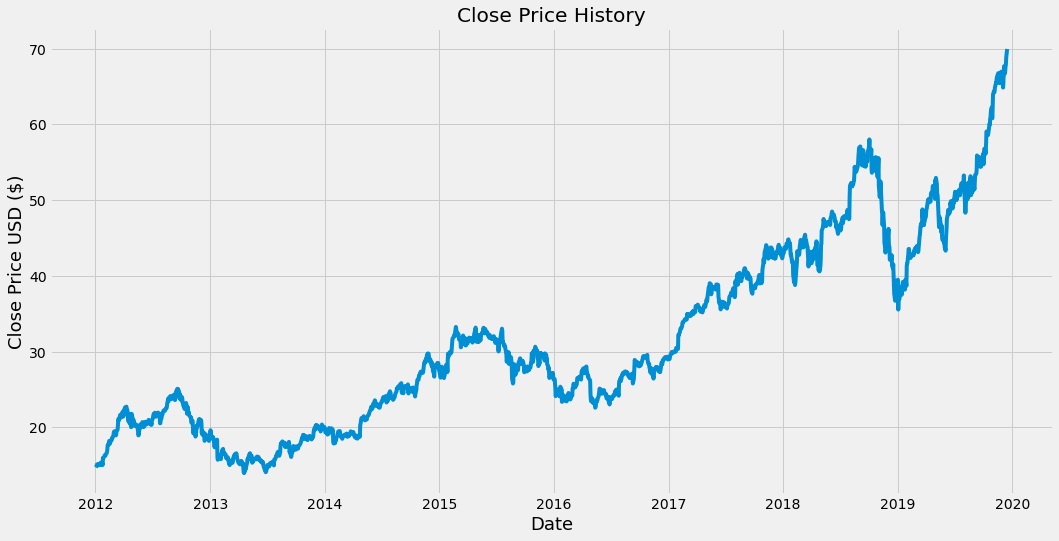

In [ ]:
# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.plot(df["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.show()



In [ ]:
# Create a new dataframe with only the "Close Column"
data = df.filter(["Close"])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

1602

In [ ]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0131974 ],
       [0.01460639],
       [0.01753278],
       ...,
       [0.96251174],
       [0.97897982],
       [1.        ]])

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 60:
    print(x_train)
    print(y_train)
    print()




[array([0.0131974 , 0.01460639, 0.01753278, 0.0203189 , 0.01989174,
       0.02085445, 0.02041453, 0.01967497, 0.01866762, 0.02178528,
       0.02459691, 0.02372983, 0.01898002, 0.02351306, 0.01905016,
       0.03578601, 0.03449178, 0.0361813 , 0.03983449, 0.0420468 ,
       0.04186191, 0.04117973, 0.04408699, 0.04682209, 0.04992063,
       0.05492545, 0.06543874, 0.06559812, 0.0714509 , 0.07582451,
       0.06830775, 0.07120224, 0.07114487, 0.07926096, 0.07810697,
       0.08024277, 0.08408086, 0.08621669, 0.0923691 , 0.0968511 ,
       0.09814534, 0.09859802, 0.09093461, 0.08908567, 0.08935984,
       0.09656423, 0.09859166, 0.10294617, 0.1132108 , 0.12690551,
       0.12434252, 0.12434889, 0.13425015, 0.13734869, 0.13514271,
       0.13312806, 0.13103049, 0.13799896, 0.14278065, 0.14478257])]
[0.139835129205152]



In [ ]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1542, 60, 1)

In [ ]:
# Build the LSTM model 
model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [ ]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1542/1542 [==============================] - 38s 23ms/step - loss: 8.1907e-04


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1542 to 2002
test_data = scaled_data[training_data_len - 60: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
# Reshape the data (Convert it from 2 to 3 dimensional shape)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [ ]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
# Get the root mean squared error (RMSE) (The lower values of RMSE indicate a better fit)
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse


1.5271817302703858

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


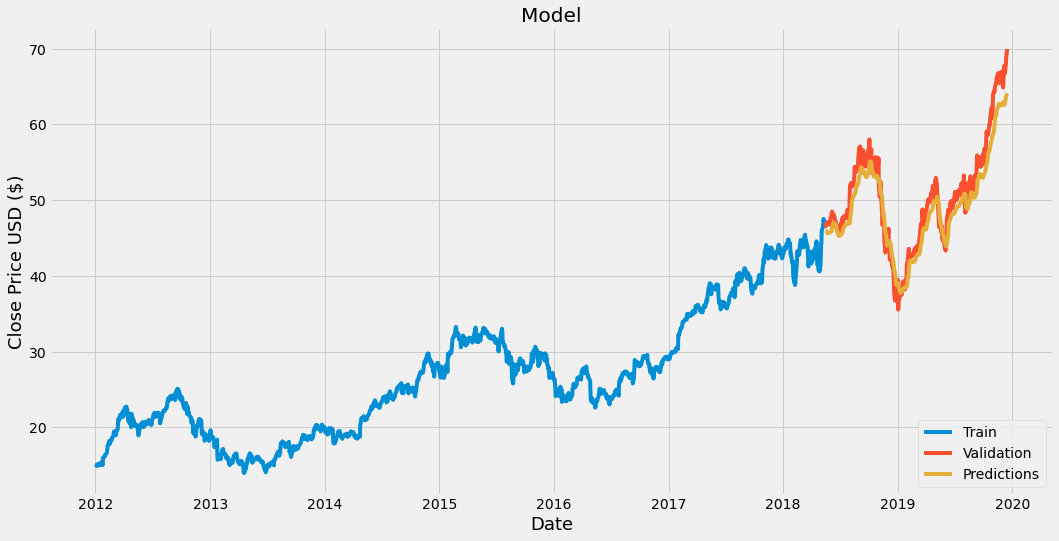

In [ ]:
# Plot the data 
train = data[:training_data_len]
valid = data[training_data_len:]
valid["Predictions"] = predictions

# Visualize the data 
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Train", "Validation", "Predictions"], loc="lower right")
plt.show()


In [ ]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-05-16,47.044998,45.976955
2018-05-17,46.747501,45.969818
2018-05-18,46.577499,45.895813
2018-05-21,46.907501,45.775658
2018-05-22,46.790001,45.694683
...,...,...
2019-12-10,67.120003,63.008503
2019-12-11,67.692497,63.222515
2019-12-12,67.864998,63.485134


In [ ]:
# Get the quote
apple_quote = pdr.get_data_yahoo('AAPL',data_source="yahoo", start='2012-01-01', end='2019-12-17')

# Create a new dataframe 
new_df = apple_quote.filter(["Close"])

# Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values

# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

# Create an empty list
X_test = []

# Append the past 60 days to the X_test
X_test.append(last_60_days_scaled)

# Convert the X_test data set to a numpy array 
X_test = np.array(X_test)

# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get the predicted scaled price
pred_price = model.predict(X_test)

# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)

print(pred_price)

[*********************100%***********************]  1 of 1 completed
[[64.602936]]


In [ ]:
# Get the quote
apple_quote2 = pdr.get_data_yahoo('AAPL',data_source="yahoo", start='2019-12-18', end='2019-12-19')
print(apple_quote2["Close"])

[*********************100%***********************]  1 of 1 completed
Date
2019-12-18    69.934998
Name: Close, dtype: float64


In [ ]:
train

,Close
Date,
2012-01-03,14.686786
2012-01-04,14.765714
2012-01-05,14.929643
2012-01-06,15.085714
2012-01-09,15.061786
...,...
2018-05-09,46.840000
2018-05-10,47.509998
2018-05-11,47.147499


In [ ]:
valid


,Close,Predictions
Date,,
2018-05-16,47.044998,45.976955
2018-05-17,46.747501,45.969818
2018-05-18,46.577499,45.895813
2018-05-21,46.907501,45.775658
2018-05-22,46.790001,45.694683
...,...,...
2019-12-10,67.120003,63.008503
2019-12-11,67.692497,63.222515
2019-12-12,67.864998,63.485134


In [ ]:
pd.concat([train, valid]).to_csv("Prediction_Stock_Model.csv")

In [ ]:
.